# 『 การพยากรณ์ปริมาณการผลิตเงาะในประเทศไทย โดยเทียบกับปริมาณน้ำฝน พื้นที่เพาะปลูกต่อไร่ และผลผลิตต่อไร่ 2562-2563(2019-2020) ที่มีผลกระทบ 』

# Github file Dataset

> [Datasets](https://github.com/S0ngSTK/Dataset_Final)


# 1.เตรียมข้อมูล

ResouceDataset From website https://digi.data.go.th/showcase/thailand-rainfall-data/

## ปริมาณน้ำฝนในประเทศไทยตั้งปี พ.ศ.2561(2018) - พ.ศ.2565(2022)
## มี column ทั้งหมด 11 column

1.ProvinceID รหัสของแต่ละจังหวัด

2.ProvinceName  ชื่อจังหวัด

3.ProvinceName 2  ชื่อจังหวัดภาษาอังกฤษ

4.MinRain ปริมาณน้ำฝนที่น้อยที่สุดต่อเดือน

5.MaxRain ปริมาณน้ำฝนที่มากที่สุดต่อเดือน

6.AvgRain  ค่าเฉลี่ยของปริมาณน้ำฝนต่อเดือน

7.region  ภูมิภาคของจังหวัด

8.Year ปี

9Month เดือนตัวเลข

10Date  วันที่

11Month_TH เดือนภาษาไทย


In [20]:
from sklearn.metrics import mean_squared_error,r2_score
def find_error(name_model,y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your actual target values
    print("Mean Squared Error (MSE):", mse)
    r2 = r2_score(y_test, y_pred)  # Replace y_test with your actual target values
    print("R-squared (R2):", r2)
    S = {name_model : [{'mse' : mse},{"R2": r2}]}
    return S

In [21]:
import pandas as pd

In [22]:
rainfall = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/%E0%B8%8A%E0%B8%B8%E0%B8%94%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%9D%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2-.csv')

In [23]:
rainfall.iloc[0]

ProvinceID                   10
ProvinceName      กรุงเทพมหานคร
ProvinceName 2          Bangkok
MinRain               54.299999
MaxRain              257.230011
AvgRain              142.119137
region                     กลาง
Year                       2018
Month                         1
Date                     1/1/18
Month_TH                 มกราคม
Name: 0, dtype: object

## ข้อมูลแบ่งเป็นเดือนๆ

In [24]:
rainfall

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
0,10,กรุงเทพมหานคร,Bangkok,54.299999,257.230011,142.119137,กลาง,2018,1,1/1/18,มกราคม
1,11,สมุทรปราการ,Samut Prakan,76.250000,256.100006,137.302046,กลาง,2018,1,1/1/18,มกราคม
2,12,นนทบุรี,Nonthaburi,38.360001,161.470001,113.433771,กลาง,2018,1,1/1/18,มกราคม
3,13,ปทุมธานี,Pathum Thani,51.439999,116.500000,82.901688,กลาง,2018,1,1/1/18,มกราคม
4,14,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,8.850000,88.589996,39.960089,กลาง,2018,1,1/1/18,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
4230,92,ตรัง,Trang,158.050003,433.649994,293.423136,ใต้,2022,7,1/7/22,กรกฎาคม
4231,93,พัทลุง,Phatthalung,101.309998,264.140015,144.777569,ใต้,2022,7,1/7/22,กรกฎาคม
4232,94,ปัตตานี,Pattani,127.589996,214.440002,172.280939,ใต้,2022,7,1/7/22,กรกฎาคม
4233,95,ยะลา,Yala,122.440002,189.169998,148.495964,ใต้,2022,7,1/7/22,กรกฎาคม


In [25]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


## ทำการเลือกปริมาณน้ำฝนเฉพาะปี 2019-2020

In [26]:
rainfall_2019_2020 = rainfall[(rainfall['Year'] >= 2019) & (rainfall['Year'] <= 2020) & (rainfall['region'] == "ใต้")]

In [27]:
rainfall_2019_2020

,ProvinceID,ProvinceName,ProvinceName 2,MinRain,MaxRain,AvgRain,region,Year,Month,Date,Month_TH
987,80,นครศรีธรรมราช,Nakhon Si Thammarat,89.180000,418.029999,230.332189,ใต้,2019,1,1/1/19,มกราคม
988,81,กระบี่,Krabi,11.220000,143.479996,86.016721,ใต้,2019,1,1/1/19,มกราคม
989,82,พังงา,Phangnga,77.070000,166.229996,113.841769,ใต้,2019,1,1/1/19,มกราคม
990,83,ภูเก็ต,Phuket,50.279999,180.520004,106.568168,ใต้,2019,1,1/1/19,มกราคม
991,84,สุราษฎร์ธานี,Surat Thani,94.029999,227.259995,133.211745,ใต้,2019,1,1/1/19,มกราคม
...,...,...,...,...,...,...,...,...,...,...,...
2767,92,ตรัง,Trang,134.639999,493.760010,288.460522,ใต้,2020,12,1/12/20,ธันวาคม
2768,93,พัทลุง,Phatthalung,300.170013,570.330017,471.701779,ใต้,2020,12,1/12/20,ธันวาคม
2769,94,ปัตตานี,Pattani,478.510010,840.950012,577.491200,ใต้,2020,12,1/12/20,ธันวาคม
2770,95,ยะลา,Yala,415.079987,753.780029,595.461190,ใต้,2020,12,1/12/20,ธันวาคม


ตรวจสอบค่า Missing 

In [28]:
rainfall_2019_2020.isnull().sum()

ProvinceID        0
ProvinceName      0
ProvinceName 2    0
MinRain           0
MaxRain           0
AvgRain           0
region            0
Year              0
Month             0
Date              0
Month_TH          0
dtype: int64

ไม่มีค่า Missing

In [29]:
rainfall_2019_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 987 to 2771
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      336 non-null    int64  
 1   ProvinceName    336 non-null    object 
 2   ProvinceName 2  336 non-null    object 
 3   MinRain         336 non-null    float64
 4   MaxRain         336 non-null    float64
 5   AvgRain         336 non-null    float64
 6   region          336 non-null    object 
 7   Year            336 non-null    int64  
 8   Month           336 non-null    int64  
 9   Date            336 non-null    object 
 10  Month_TH        336 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 31.5+ KB


## ทำการรวมข้อมูลของแต่ละเดือนให้กลายเป็นปีโดยใช้ Groupby

In [30]:
grouped_rainfall = rainfall_2019_2020.groupby(['Year','ProvinceID','ProvinceName'])['AvgRain'].sum().reset_index()
grouped_rainfall

,Year,ProvinceID,ProvinceName,AvgRain
0,2019,80,นครศรีธรรมราช,1770.628702
1,2019,81,กระบี่,1679.101531
2,2019,82,พังงา,2688.489717
3,2019,83,ภูเก็ต,2026.694955
4,2019,84,สุราษฎร์ธานี,1739.077761
5,2019,85,ระนอง,2774.835102
6,2019,86,ชุมพร,2091.828801
7,2019,90,สงขลา,1540.440778
8,2019,91,สตูล,1729.760350
9,2019,92,ตรัง,1911.088561


## นำเข้าข้อมูลเงาะปี 2020
สำนักงานเศรษฐกิจการเกรษตร

ResouceDataset From website https://mis-app.oae.go.th/
เกี่ยวกับข้อมูล

In [31]:
rambutan_products_2020 = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2020.csv')

In [32]:
rambutan_products_2020

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year
0,ตราด,104248,0.3860,50472,2065.46,2020
1,จันทบุรี,98063,0.3631,53255,1841.39,2020
2,สุราษฎร์ธานี,20559,0.0761,25848,795.38,2020
3,ระยอง,8326,0.0308,5038,1652.64,2020
4,นครศรีธรรมราช,6701,0.0248,11935,561.46,2020
5,นราธิวาส,5507,0.0204,14614,376.83,2020
6,เชียงราย,2916,0.0108,6240,467.31,2020
7,น่าน,2363,0.0088,6963,339.37,2020
8,พังงา,2204,0.0082,3797,580.46,2020
9,ศรีสะเกษ,2076,0.0077,1837,1130.10,2020


In [33]:
rambutan_products_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ProvinceName                      42 non-null     object 
 1   ผลผลิต(ตัน)                       42 non-null     int64  
 2   สัดส่วน                           42 non-null     float64
 3   เนื้อที่เก็บเกี่ยว(ไร่)           42 non-null     int64  
 4   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  42 non-null     float64
 5   Year                              42 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.1+ KB


In [34]:
rambutan_products_2020.shape

(42, 6)

## นำเข้าข้อมูลเงาะปี 2019

https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2019.csv

In [35]:
rambutan_products_2019 = pd.read_csv('https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/rambutan_2019.csv')

In [36]:
rambutan_products_2019

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year
0,จันทบุรี,96326,0.3440,54757,1759.15,2019
1,ตราด,86886,0.3103,49331,1761.29,2019
2,สุราษฎร์ธานี,37819,0.1351,26116,1448.12,2019
3,นราธิวาส,12185,0.0435,17564,693.75,2019
4,ระยอง,7877,0.0281,5108,1542.09,2019
5,นครศรีธรรมราช,7586,0.0271,12110,626.42,2019
6,เชียงราย,3777,0.0135,5986,630.97,2019
7,พังงา,2629,0.0094,3791,693.48,2019
8,น่าน,2424,0.0087,6803,356.31,2019
9,ศรีสะเกษ,2202,0.0079,1840,1196.74,2019


In [37]:
rambutan_products_2019.shape

(42, 6)

# ต่อตารางเงาะสองปีเข้าด้วยกัน

In [38]:
merged_rambutan = pd.concat([rambutan_products_2019,rambutan_products_2020],ignore_index=True)

In [39]:
merged_rambutan

,ProvinceName,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),Year
0,จันทบุรี,96326,0.3440,54757,1759.15,2019
1,ตราด,86886,0.3103,49331,1761.29,2019
2,สุราษฎร์ธานี,37819,0.1351,26116,1448.12,2019
3,นราธิวาส,12185,0.0435,17564,693.75,2019
4,ระยอง,7877,0.0281,5108,1542.09,2019
...,...,...,...,...,...,...
79,แม่ฮ่องสอน,49,0.0002,144,340.28,2020
80,ยโสธร,45,0.0002,76,592.11,2020
81,หนองบัวลำภู,44,0.0002,50,880.00,2020
82,นครราชสีมา,31,0.0001,74,418.92,2020


## ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
> resource: (สำนักงานพัฒนารัฐบาลดิจิทัล (องค์การมหาชน) (สพร.), data.go.th): https://data.go.th/th/dataset/tmax-tmin

## เกี่ยวกับข้อมูล
ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
*   id: ลำดับข้อมูล
*   Year: ปีที่บันทึกข้อมูลอุณหภูมิ
*   Month: ลำดับที่ของเดือน
*   ProvinceID: รหัสจังหวัด
*   ProvinceName: ชื่อจังหวัด
*   Tmax: อุณหภูมิสูงสุด
*   Tmin: อุณหภูมิต่ำสุด

In [146]:
temp = pd.read_csv("https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/tmax-tmin.csv")
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4550 non-null   int64  
 1   Month         4550 non-null   int64  
 2   ProvinceID    4550 non-null   int64  
 3   ProvinceName  4550 non-null   object 
 4   Tmax          4550 non-null   float64
 5   Tmin          4525 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 213.4+ KB


In [147]:
temp.isnull().sum()

Year             0
Month            0
ProvinceID       0
ProvinceName     0
Tmax             0
Tmin            25
dtype: int64

In [119]:
temp_min_mean = temp['Tmin'].mean()
temp["Tmin"].fillna(temp_min_mean,inplace=True)
temp.isnull().sum()

Year            0
Month           0
ProvinceID      0
ProvinceName    0
Tmax            0
Tmin            0
dtype: int64

In [121]:
temp["Tavg"] = (temp['Tmax'] + temp['Tmin']) / 2
temp

,Year,Month,ProvinceID,ProvinceName,Tmax,Tmin,Tavg
0,2018,1,10,กรุงเทพมหานคร,35.5,18.0,26.75
1,2018,1,11,สมุทรปราการ,36.0,18.4,27.20
2,2018,1,13,ปทุมธานี,35.6,18.0,26.80
3,2018,1,14,พระนครศรีอยุธยา,35.5,15.4,25.45
4,2018,1,16,ลพบุรี,36.2,14.7,25.45
...,...,...,...,...,...,...,...
4545,2023,10,92,ตรัง,35.0,24.0,29.50
4546,2023,10,93,พัทลุง,34.8,23.5,29.15
4547,2023,10,94,ปัตตานี,34.6,23.2,28.90
4548,2023,10,95,ยะลา,35.4,23.0,29.20


In [143]:
temp_2020_2019 = temp[(temp["Year"] >= 2019) & (temp["Year"] <=2020)]
temp_comple = temp_2020_2019.groupby(['Year','ProvinceID','ProvinceName'])['Tavg'].sum().reset_index()
temp_comple["Tavg"] = temp_comple['Tavg']/12
temp_comple


,Year,ProvinceID,ProvinceName,Tavg
0,2019,10,กรุงเทพมหานคร,30.095833
1,2019,11,สมุทรปราการ,28.541667
2,2019,13,ปทุมธานี,30.562500
3,2019,14,พระนครศรีอยุธยา,29.262500
4,2019,16,ลพบุรี,29.137500
...,...,...,...,...
125,2020,92,ตรัง,29.158333
126,2020,93,พัทลุง,28.683333
127,2020,94,ปัตตานี,28.887500
128,2020,95,ยะลา,28.579167


# 2.ทำการ merge Data ปริมาณน้ำฝนกับผลผลิตเงาะ


In [145]:
merged_rain_rumbatan = grouped_rainfall.merge(merged_rambutan, on=['Year', 'ProvinceName'])
merged_rain_rumbatan = merged_rain_rumbatan.merge(temp_comple,on=['Year', 'ProvinceName'])
merged_rain_rumbatan

,Year,ProvinceID_x,ProvinceName,AvgRain,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.),ProvinceID_y,Tavg
0,2019,80,นครศรีธรรมราช,1770.628702,7586,0.0271,12110,626.42,80,28.975000
1,2019,81,กระบี่,1679.101531,411,0.0015,858,479.02,81,28.408333
2,2019,82,พังงา,2688.489717,2629,0.0094,3791,693.48,82,28.254167
3,2019,83,ภูเก็ต,2026.694955,237,0.0008,379,625.33,83,28.570833
4,2019,84,สุราษฎร์ธานี,1739.077761,37819,0.1351,26116,1448.12,84,28.770833
5,2019,85,ระนอง,2774.835102,277,0.0010,408,678.92,85,28.625000
6,2019,86,ชุมพร,2091.828801,2164,0.0077,2589,835.84,86,28.520833
7,2019,90,สงขลา,1540.440778,1961,0.0070,2603,753.36,90,28.445833
8,2019,91,สตูล,1729.760350,1059,0.0038,1314,805.94,91,28.583333
9,2019,92,ตรัง,1911.088561,1269,0.0045,1318,962.82,92,28.929167


## อ้างอิง Geojson file from https://github.com/chingchai/OpenGISData-Thailand

In [124]:
import folium
import geopandas as gpd
import random
import pandas as pd

# Load GeoJSON data for Thailand provinces
geojson_path = "https://raw.githubusercontent.com/S0ngSTK/Dataset_Final/main/Provinces2.geojson"
thailand_provinces = gpd.read_file(geojson_path)

# Create a Folium map centered around Thailand
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map = folium.Map(location=thailand_coordinates, zoom_start=6)

# Define a custom styling function with random colors
def style_function(feature):
    # Generate a random color in hex format
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    
    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Add GeoJSON layer for Thailand provinces with custom styling
folium.GeoJson(
    thailand_provinces,
    name='geojson',
    style_function=style_function
).add_to(my_map)

# Add markers with custom pin icons
locations = {
    'นครศรีธรรมราช': {'location': (8.296481173044892, 99.78329018178862), 'color': 'blue'},
    'กระบี่': {'location': (8.23172054078034, 98.97731156679664), 'color': 'red'},
    'พังงา': {'location': (8.615056013321578, 98.42286882717158), 'color': 'green'},
    'ภูเก็ต': {'location': (7.97395222866153, 98.34033744435013), 'color': 'orange'},
    'สุราษฎร์ธานี': {'location': ( 8.928140414012539, 98.94522672220086), 'color': 'purple'},
    'ระนอง': {'location': (9.934629476268167, 98.63966193725061), 'color': 'darkred'},
    'ชุมพร': {'location': (10.39579869304647, 99.08198937303766), 'color': 'lightblue'},
    'สงขลา ': {'location': (6.894582483375718, 100.58969163543715), 'color': 'darkblue'},
    'สตูล': {'location': (6.887765382441354, 99.9606383912983), 'color': 'darkgreen'},
    'ตรัง ': {'location': (7.556154149938087, 99.57650576215633), 'color': 'gray'},
    'พัทลุง': {'location': (7.519331964319986, 100.07768152642802), 'color': 'orange'},
    'ปัตตานี ': {'location': (6.756006418059202, 101.31865723859552), 'color': 'black'},
    'ยะลา': {'location': (6.147610834634966, 101.2572747987984), 'color': 'blue'},
    'นราธิวาส': {'location': (6.178263826663819, 101.71269458368498), 'color': 'red'}
}

for label, info in locations.items():
    location = info['location']
    color = info['color']
    folium.Marker(location=location, popup=label, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map)


my_map


## ทำการดรอปตารางที่ไม่ส่งผลต่อการพยาการ

## ทำการเปลี่ยนชื่อ column


In [42]:
merged_rain_rumbatan.rename(columns={
                            'ผลผลิต(ตัน)': "Products",
                            'เนื้อที่เก็บเกี่ยว(ไร่)':'HarvestedArea',
                            'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)':'Productivity-per-rai'},inplace=True)

In [43]:
merged_rain_rumbatan

,Year,ProvinceID,ProvinceName,AvgRain,Products,สัดส่วน,HarvestedArea,Productivity-per-rai
0,2019,80,นครศรีธรรมราช,1770.628702,7586,0.0271,12110,626.42
1,2019,81,กระบี่,1679.101531,411,0.0015,858,479.02
2,2019,82,พังงา,2688.489717,2629,0.0094,3791,693.48
3,2019,83,ภูเก็ต,2026.694955,237,0.0008,379,625.33
4,2019,84,สุราษฎร์ธานี,1739.077761,37819,0.1351,26116,1448.12
5,2019,85,ระนอง,2774.835102,277,0.0010,408,678.92
6,2019,86,ชุมพร,2091.828801,2164,0.0077,2589,835.84
7,2019,90,สงขลา,1540.440778,1961,0.0070,2603,753.36
8,2019,91,สตูล,1729.760350,1059,0.0038,1314,805.94
9,2019,92,ตรัง,1911.088561,1269,0.0045,1318,962.82


## Drop ตารางที่ไม่สำพันธ์กับการคาดการณ์ข้อมูล

In [44]:
merged_rain_rumbatan.drop(['Year','ProvinceID','ProvinceName','สัดส่วน'],axis=1,inplace=True)

In [45]:
merged_rain_rumbatan

,AvgRain,Products,HarvestedArea,Productivity-per-rai
0,1770.628702,7586,12110,626.42
1,1679.101531,411,858,479.02
2,2688.489717,2629,3791,693.48
3,2026.694955,237,379,625.33
4,1739.077761,37819,26116,1448.12
5,2774.835102,277,408,678.92
6,2091.828801,2164,2589,835.84
7,1540.440778,1961,2603,753.36
8,1729.760350,1059,1314,805.94
9,1911.088561,1269,1318,962.82


## Drop Outlier ที่มีขนาด Over เกินไป

In [46]:
drop_over_outlier = merged_rain_rumbatan[merged_rain_rumbatan['Products']>10000].index
merged_rain_rumbatan.drop(drop_over_outlier,inplace=True)

In [47]:
merged_rain_rumbatan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 27
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AvgRain               25 non-null     float64
 1   Products              25 non-null     int64  
 2   HarvestedArea         25 non-null     int64  
 3   Productivity-per-rai  25 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1000.0 bytes


## ทำการพลอตกราฟตารางทั้งหมด

<Axes: >

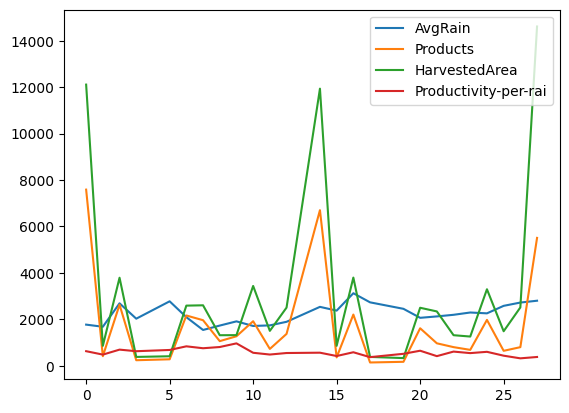

In [48]:
merged_rain_rumbatan.plot()

## ทำการพลอตกราฟความสัมพันธ์ระหว่างผลผลิตกับค่าเฉลี่ยปริมาณน้ำฝนต่อปี

<Axes: >

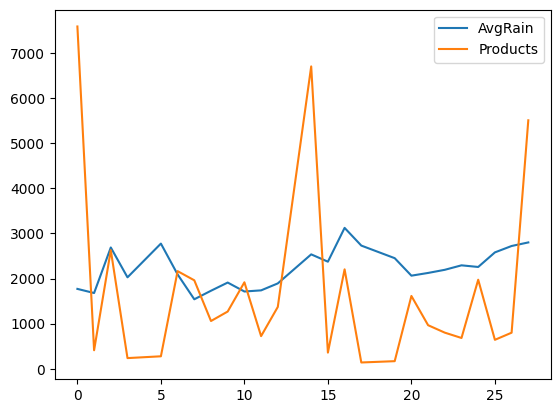

In [49]:
columns_to_plot = ["AvgRain", "Products"]
merged_rain_rumbatan[columns_to_plot].plot()


## plot graph โชว์ความสัมพันธ์ของแต่ละตาราง

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

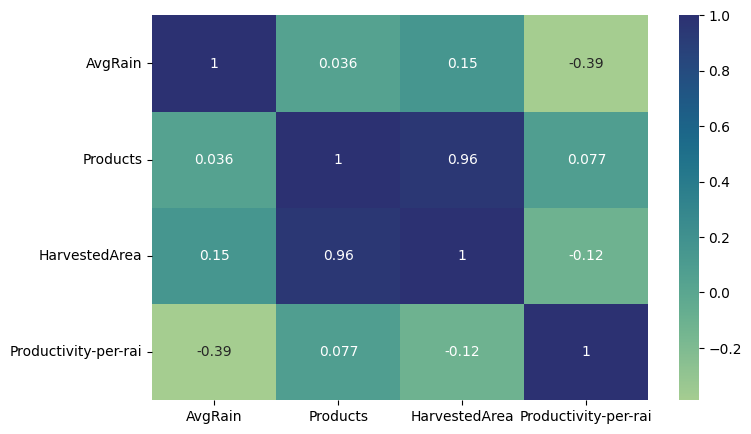

In [51]:
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(merged_rain_rumbatan.corr(), cmap="crest",annot=True)

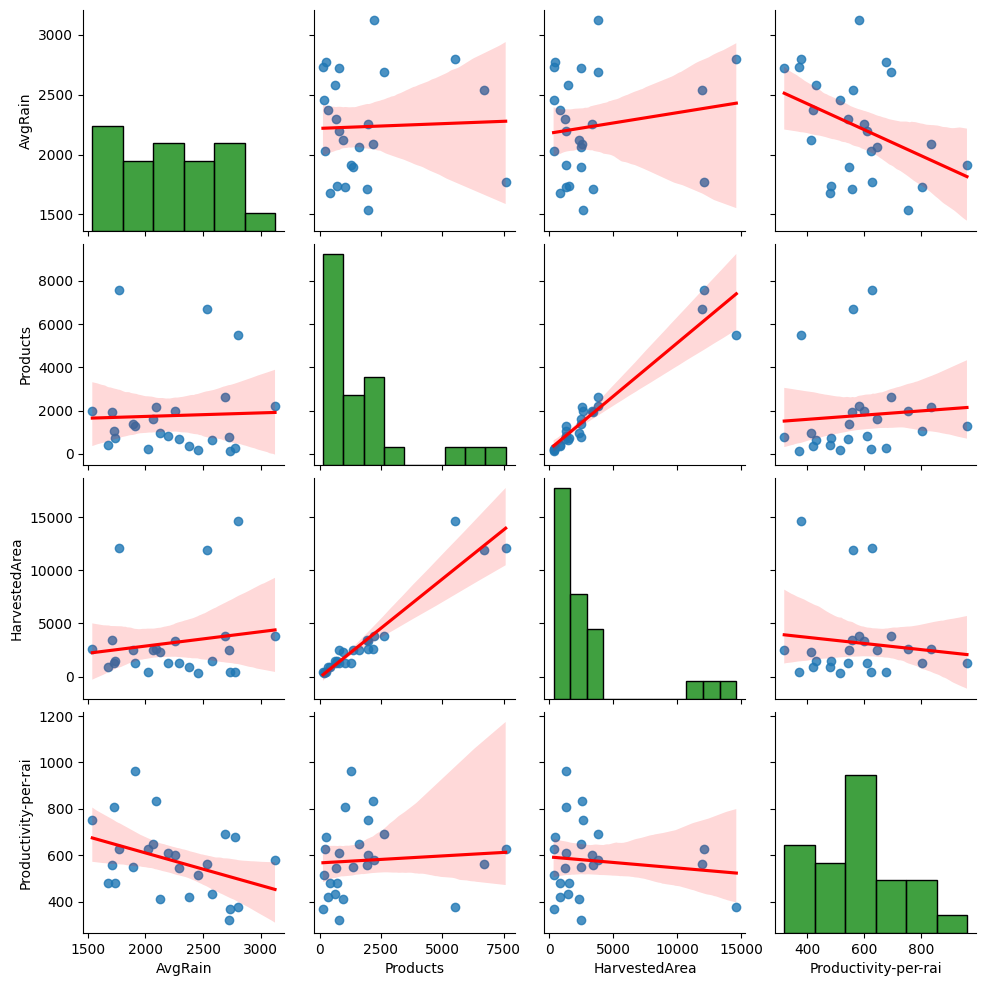

In [52]:
sns.pairplot(merged_rain_rumbatan,
             kind='reg',
             plot_kws={'line_kws': {'color': 'red'}},
             diag_kws={'color': 'green'})

# Start Model KNN-R

## กำหนด X and Y ในการทดสอบ

In [53]:
from sklearn.model_selection import train_test_split
x = merged_rain_rumbatan[['AvgRain','HarvestedArea', 'Productivity-per-rai']]

In [54]:
y = merged_rain_rumbatan['Products']

## สร้างตัว Train และ Test

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



## หา K ที่ดีที่สุุด

In [56]:

# Define a range of 'k' values to test
k_values = range(1, 21)
mse_values = []  # Mean Squared Error (MSE) values

for k in k_values:
    # Create and fit the KNN regression model with the current 'k' value
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE) for the current 'k' value
    mse = mean_squared_error(y_test, y_pred)
    
    mse_values.append(mse)

# Find the best 'k' value
best_k = k_values[mse_values.index(min(mse_values))]

## Plot ดูค่า K ที่ดีที่สุด

Best 'k' value: 3


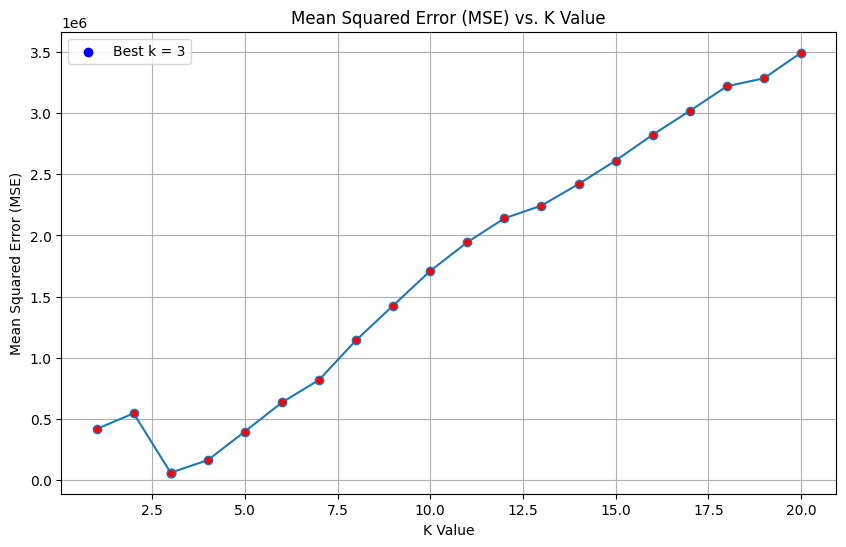

In [57]:
# Plot 'k' versus MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o',markerfacecolor='red')
plt.title("Mean Squared Error (MSE) vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)

plt.scatter(best_k, min(mse_values), color='blue', label=f'Best k = {best_k}')
plt.legend()



print("Best 'k' value:", best_k)

## กำหนด K ที่สุดให้สำหรับ model KNN-R

In [58]:
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
import seaborn as sns

In [60]:
merged_rain_rumbatan

,AvgRain,Products,HarvestedArea,Productivity-per-rai
0,1770.628702,7586,12110,626.42
1,1679.101531,411,858,479.02
2,2688.489717,2629,3791,693.48
3,2026.694955,237,379,625.33
5,2774.835102,277,408,678.92
6,2091.828801,2164,2589,835.84
7,1540.440778,1961,2603,753.36
8,1729.760350,1059,1314,805.94
9,1911.088561,1269,1318,962.82
10,1712.952247,1917,3436,557.92


## ทำการ Predict x_test , x 

In [62]:
y_pred = knn.predict(X_test)
y_pred

array([1697.        , 1697.        ,  268.33333333, 5638.66666667,
       1801.        ])

In [63]:
y_pred_x = knn.predict(x)
y_pred_x

array([5638.66666667,  569.        , 2173.33333333,  272.33333333,
        268.33333333, 1697.        , 1697.        , 1017.33333333,
       1043.        , 1950.66666667,  861.33333333, 1697.        ,
       5638.66666667,  614.33333333, 1801.        ,  268.33333333,
        227.66666667, 1697.        , 1310.        ,  917.66666667,
        708.66666667, 2173.33333333,  708.66666667, 1310.        ,
       5638.66666667])

## เก็บ Predict X ลงใน Dataframe merged_rain_rumbatan['Predict_Product_KNNR']

In [64]:
merged_rain_rumbatan['Predict_Product_KNNR'] = knn.predict(x)
merged_rain_rumbatan

,AvgRain,Products,HarvestedArea,Productivity-per-rai,Predict_Product_KNNR
0,1770.628702,7586,12110,626.42,5638.666667
1,1679.101531,411,858,479.02,569.000000
2,2688.489717,2629,3791,693.48,2173.333333
3,2026.694955,237,379,625.33,272.333333
5,2774.835102,277,408,678.92,268.333333
6,2091.828801,2164,2589,835.84,1697.000000
7,1540.440778,1961,2603,753.36,1697.000000
8,1729.760350,1059,1314,805.94,1017.333333
9,1911.088561,1269,1318,962.82,1043.000000
10,1712.952247,1917,3436,557.92,1950.666667


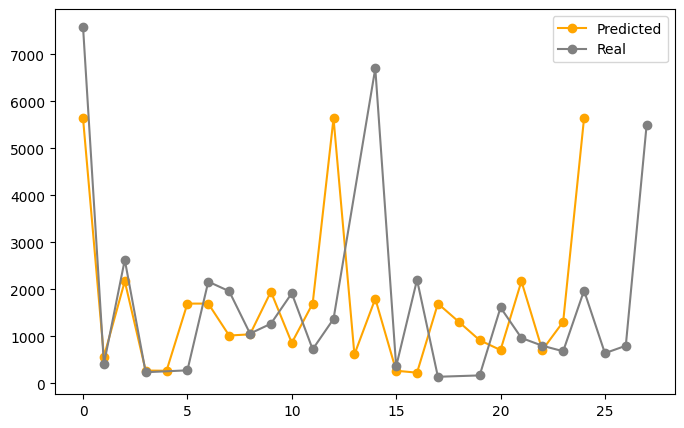

In [65]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred_x, label = 'Predicted',
         linestyle="-", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(merged_rain_rumbatan['Products'], label = 'Real',
         linestyle="-", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

In [66]:
absolute_dis_list = abs(y_pred_x - merged_rain_rumbatan['Products'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred_x, 'real_products': merged_rain_rumbatan['Products'], 'absolute_difference': absolute_dis_list})

In [104]:
KNN_model = find_error("KNN",y_pred,y_test)

Mean Squared Error (MSE): 1534351.4733231848
R-squared (R2): 0.8191389107838669


# Linear regression

In [95]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = regressor.predict(X_test)
y_pred

array([1443.92314618, 1596.27023893, -216.37168645, 8252.15770615,
       2147.13501607])

In [97]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([1967.97939498,  748.61245947,  962.74974869, 2034.22304324,
       1206.84552053,  340.30732664, 1981.0580899 ,  815.11353764,
       1466.70467424, 1899.72015716,   35.410015  ,  303.89022931,
       2385.67981244,  190.29723863,  366.40370158,  566.83232436,
        655.13216013, 7010.47188363, 1086.2227138 , 7305.34596865])

In [98]:
y_pred_x = regressor.predict(x)
y_pred_x

array([7305.34596865,  366.40370158, 2385.67981244,  303.89022931,
        340.30732664, 1981.0580899 , 1899.72015716, 1206.84552053,
       1466.70467424, 2034.22304324,  748.61245947, 1443.92314618,
       7010.47188363,  190.29723863, 2147.13501607, -216.37168645,
         35.410015  , 1596.27023893, 1086.2227138 ,  815.11353764,
        655.13216013, 1967.97939498,  566.83232436,  962.74974869,
       8252.15770615])

In [100]:
mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your actual target values
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)  # Replace y_test with your actual target values
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1534351.4733231848
R-squared (R2): 0.526584434977813


In [101]:
absolute_dis_list = abs(y_pred_x - merged_rain_rumbatan['Products'])
result_df_linear = pd.DataFrame({'y_pred': y_pred_x, 'real_products': merged_rain_rumbatan['Products'], 'absolute_difference': absolute_dis_list})

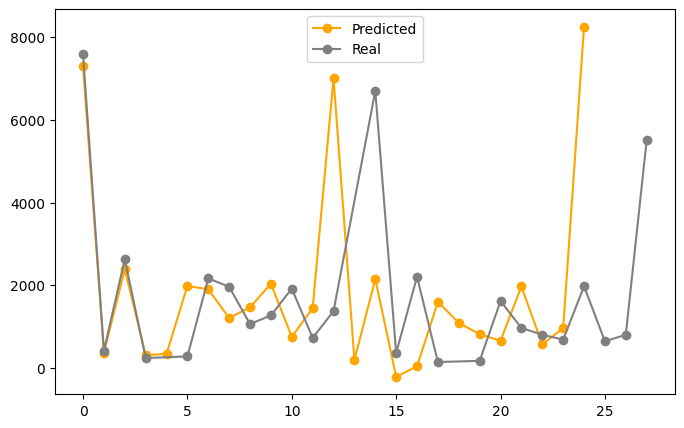

In [80]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred_x, label = 'Predicted', linestyle="-", marker='o', color='orange')
plt.plot(merged_rain_rumbatan['Products'], label = 'Real', linestyle="-", marker='o', color='grey')
plt.legend()

In [81]:
result_df_linear

,y_pred,real_products,absolute_difference
0,7305.345969,7586,280.654031
1,366.403702,411,44.596298
2,2385.679812,2629,243.320188
3,303.890229,237,66.890229
5,340.307327,277,63.307327
6,1981.058090,2164,182.941910
7,1899.720157,1961,61.279843
8,1206.845521,1059,147.845521
9,1466.704674,1269,197.704674
10,2034.223043,1917,117.223043


In [83]:
result_df_knnr

,y_pred,real_products,absolute_difference
0,5638.666667,7586,1947.333333
1,569.000000,411,158.000000
2,2173.333333,2629,455.666667
3,272.333333,237,35.333333
5,268.333333,277,8.666667
6,1697.000000,2164,467.000000
7,1697.000000,1961,264.000000
8,1017.333333,1059,41.666667
9,1043.000000,1269,226.000000
10,1950.666667,1917,33.666667


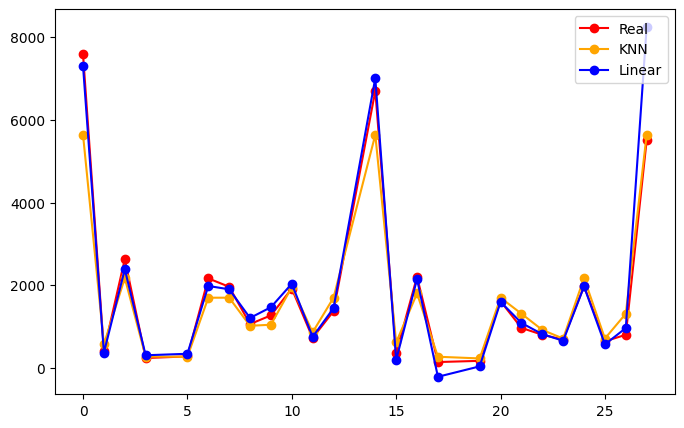

In [84]:
plt.figure(figsize = (8, 5))
plt.plot(merged_rain_rumbatan['Products'], label = 'Real', linestyle="-", marker='o', color='red') # Real Y
plt.plot(result_df_knnr['y_pred'], label = 'KNN', linestyle="-", marker='o', color='orange') # KNNR
plt.plot(result_df_linear['y_pred'], label = 'Linear', linestyle="-", marker='o', color='blue') # LinearR

plt.legend()

In [93]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)  # Replace y_test with your actual target values
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)  # Replace y_test with your actual target values
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1534351.4733231848
R-squared (R2): 0.526584434977813


In [103]:
LinearRegression_model = find_error("linearRegression",y_test,y_pred)

Mean Squared Error (MSE): 1534351.4733231848
R-squared (R2): 0.526584434977813
